# Titanic Disaster and Survival : Basic Data Analysis and Predictions
#### Basic exploratory data analysis of the different features in Titanic passenger dataset, and an attempt to visualize the relationship between those features and chances of survival. Followed by an attempt to predict the chance of survival of passengers from unseen dataset.
### Solution Approch:
1. Read data
2. Prepare data for analysis: Explore data
3. Prepare data for analysis: Pre-process data
4. Analyze data (through visualization)
5. Build prediction model and predict outcomes on unseen data
6. Report insights

#### Original Dataset is available at: https://www.kaggle.com/c/titanic

#### Thank you for reading this notebook! The same is uploaded in Kaggle as well @ https://www.kaggle.com/supratimhaldar/titanic-disaster-and-survival-eda-and-prediction. Please share your thoughts, feedback and suggestions in the comments section, and upvote if you like this notebook :-)

## Section 1 : Read input data

In [37]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Set default fontsize for graphs
#plt.rcParams.update({'font.size': 12})
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 15
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)  

In [38]:
# Read the input training and test data
train_data = pd.read_csv("C:\Study\DataSets\Titanic-Survival\\train.csv")
test_data = pd.read_csv("C:\Study\DataSets\Titanic-Survival\\test.csv")
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q


## Section 2 : Prepare data for analysis: Explore data

In [39]:
# Total number of records
print("Total number of records in training dataset:", train_data.shape)
print("Total number of records in test dataset:", test_data.shape)

Total number of records in training dataset: (891, 12)
Total number of records in test dataset: (418, 11)


In [40]:
# What are the features available and what are their data type?
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
# Descriptive statistics of training data
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [42]:
# Is there any empty data in training dataset?
train_data.isnull().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [43]:
# Is there any empty data in test dataset?
test_data.isnull().sum()/test_data.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

<b>Observations:</b>
<br><br><b>Missing Data in Training Dataset:</b>
<br>1. There are considerable quantity of missing data for Age (~20%) and Cabin (~77%) features.
<br>2. Very few are missing for Embarked attribute (~0.2%), hence we can safely discard those records.
<br><br><b>Missing Data in Test Dataset:</b> 
<br>1. There are considerable quantity of missing data for Age (~20%) and Cabin (~78%) features. 
<br>2. Very few are missing for Fare attribute (~0.2%).
<br><br>NOTE: We'll deal with the missing values of in Section 3.

### The training data has 12 features (11 independent and 1 dependent variable). Let's explore each feature in some more detail.

**PassengerId**
<br>Looks like a numeric ID field with unique value for each row. Hence, it is not useful for data analysis and training model.

In [44]:
print("Min PassengerId =", train_data.PassengerId.min(), "and Max PassengerId =", train_data.PassengerId.max())
print("Total number of unique PassengerId values =", len(train_data.PassengerId.unique()))

Min PassengerId = 1 and Max PassengerId = 891
Total number of unique PassengerId values = 891


**Survived**
<br>This is a binary classification output data, which can be construed as 1 = Survived and 0 = Did not survive.
<br>We'll check the unique values to confirm if there's any value other than 0 and 1. This is the dependent variable.
<br>We'll add a new column to represent the survived data in string format.
<br><br><b>Observations:</b>
* Approximately 40% passengers did survive the disaster, while little more than 60% could not.

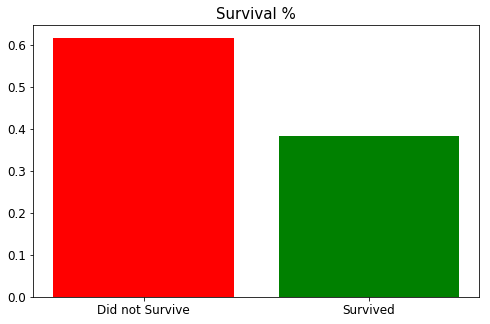

In [45]:
conditions = [train_data["Survived"] == 0, train_data["Survived"] == 1]
choices = ["Did not Survive", "Survived"]
train_data["Survived_str"] = np.select(conditions, choices)

# Plot a graph for Survived
fig, axes = plt.subplots(figsize=(8,5))
data = train_data["Survived_str"].value_counts(normalize=True)
axes.bar(data.index, data, color=['red', 'green'])
axes.set_title('Survival %', fontsize=15)
plt.show()

**Pclass**
<br>Passenger Class. A proxy for socio-economic status (SES): 1st = Upper,  2nd = Middle and 3rd = Lower.
<br>We'll add a new column to represent the pclass data in string format.
<br><br><b>Observations:</b>
* Majority of the passengers belonged to lower SES (~55%).
* Percentage of middle and upper SES passengers were almost equal.

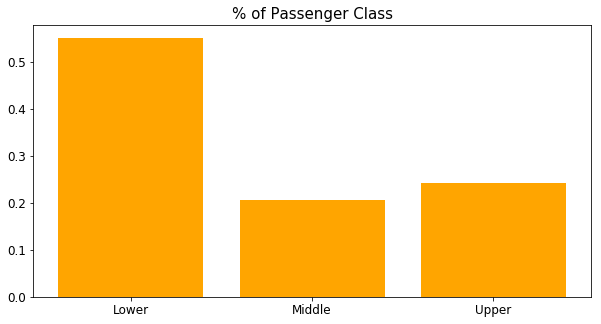

In [46]:
conditions = [train_data["Pclass"] == 1, train_data["Pclass"] == 2, train_data["Pclass"] == 3]
choices = ["Upper", "Middle", "Lower"]
train_data["Pclass_str"] = np.select(conditions, choices)

# Plot a graph for Pclass
fig, axes = plt.subplots(figsize=(10,5))
data = train_data["Pclass_str"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='orange')
axes.set_title('% of Passenger Class', fontsize=15)
plt.show()

**Name**
<br>Name is in the format - "LastName, Salutation. FirstName MiddleName". Name as a variable plays no role indetermining survival. However, we will extract the Salutation and keep in a new column. Later we'll see if a relationship can be built between Salutation and Age. That might help us fill up missing values of Age.
<br><br><b>Observations:</b>
* Almost 60% of passengers has Salutation or Title as "Mr."
* This is followed by "Miss", "Mrs.", "Master", "Rev", "Dr." and so on.
* Percentage of middle and upper SES passengers were almost equal.

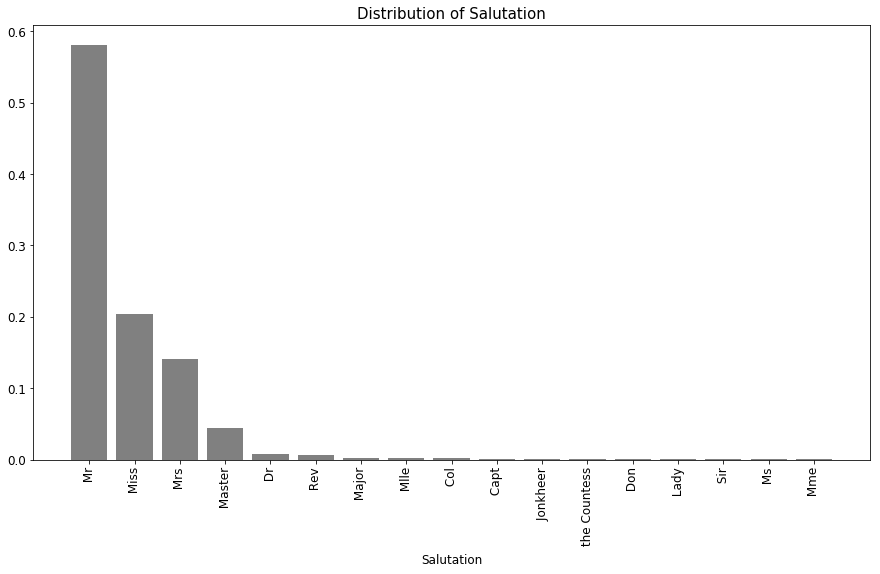

In [47]:
train_data["Salutation"] = train_data.Name.str.split(',').str[1].str.split('.').str[0]

# Plot a graph for Salutation
fig, axes = plt.subplots(figsize=(15,8))
data = train_data["Salutation"].value_counts(normalize=True)
axes.bar(data.index, data, color='0.5')
axes.set_xticklabels(data.index, rotation='vertical')
axes.set_xlabel('Salutation')
axes.set_title('Distribution of Salutation', fontsize=15)
plt.show()

**Sex**
<br>Gender - should be either Male or Female
<br><br><b>Observations:</b>
* Almost 65% passenger are Male, while rest are Female.

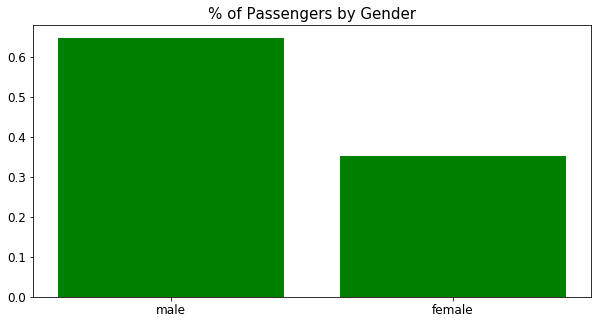

In [48]:
# Plot a graph for Sex or Gender
fig, axes = plt.subplots(figsize=(10,5))
data = train_data["Sex"].value_counts(normalize=True)
axes.bar(data.index, data, color='green')
axes.set_title('% of Passengers by Gender', fontsize=15)
plt.show()

**Age**
<br>Age of passengers. Note that there are many missing values for age. Let's look at the distribution of values.
<br><br><b>Observations:</b>
* Majority of passengers belongs to 15 to 40 years age group.
* 30 years is the most common age on-board. 

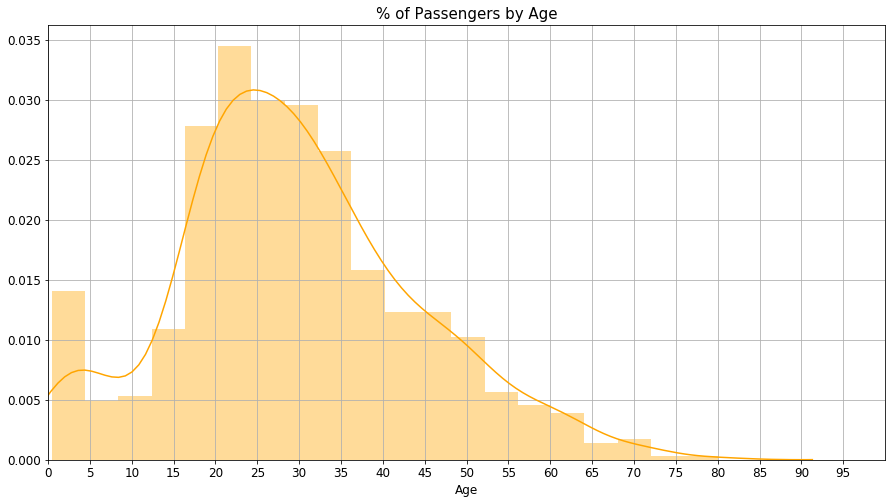

In [49]:
# Plot a graph for Age
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(train_data.loc[train_data["Age"].notnull(), "Age"], color='orange', ax=axes)
axes.set_title('% of Passengers by Age', fontsize=15)
axes.set_xlim(0,100)
axes.set_xticks(np.arange(0, 100, 5))
axes.grid(True)
plt.show()

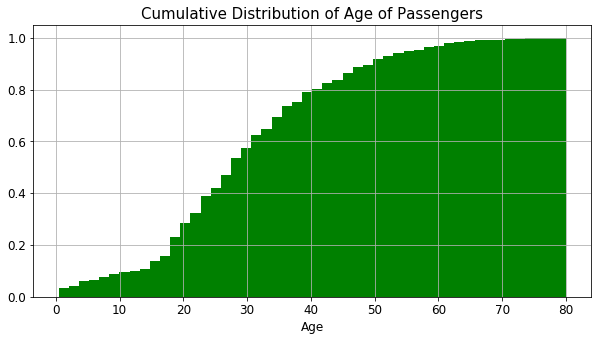

In [50]:
train_data.Age.hist(figsize=(10,5), cumulative=True, density=True, 
                    bins=50, histtype='stepfilled', color='green',
                    grid=True)
plt.title('Cumulative Distribution of Age of Passengers', fontsize=15)
plt.xlabel('Age')
axes.grid(True)
plt.show()

**SibSp**
<br># of siblings / spouses aboard the Titanic.

**Parch**
<br># of parents / children aboard the Titanic
<br><br><b>Observations:</b>
* Majority of passengers are travelling alone (~68% without siblings and spouses, and ~75% without parent/children).
* Few passengers are travelling with additional 1 or 2 family members (~20%).
* Rest are travelling with bigger family of more than 2 members (~10%).
* <b>We will combine SibSp and Parch and consider that as a single feature - "FamilySize".</b>
* Based on Family Size - approx 60% of passengers have Family Size 0, i.e. they are travelling alone.

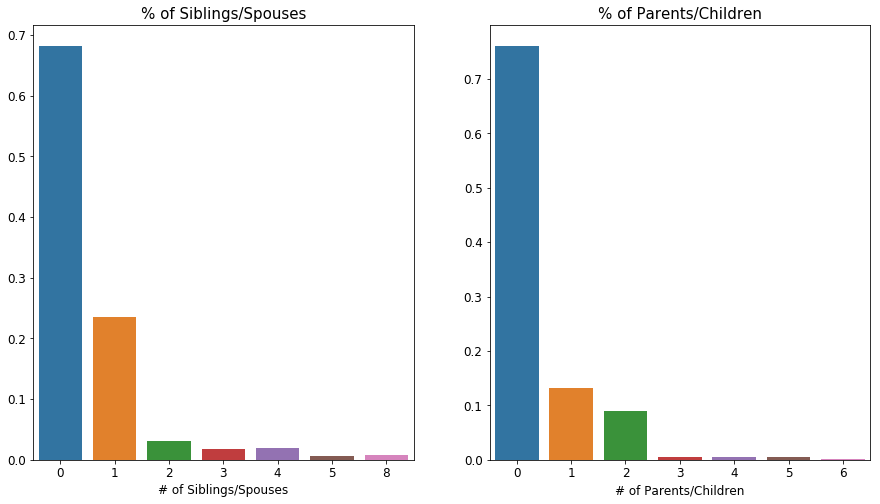

In [51]:
# Plot a graph for Sibsp and Parch
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(
    x=train_data['SibSp'], 
    y=train_data['SibSp'], 
    estimator=lambda x: len(x) / len(train_data), 
    ax=axes[0])
axes[0].set(xlabel='# of Siblings/Spouses', ylabel='')
axes[0].set_title('% of Siblings/Spouses', fontsize=15)

sns.barplot(
    x=train_data['Parch'], 
    y=train_data['Parch'], 
    estimator=lambda x: len(x) / len(train_data), 
    ax=axes[1])
axes[1].set(xlabel='# of Parents/Children', ylabel='')
axes[1].set_title('% of Parents/Children', fontsize=15)

plt.show()

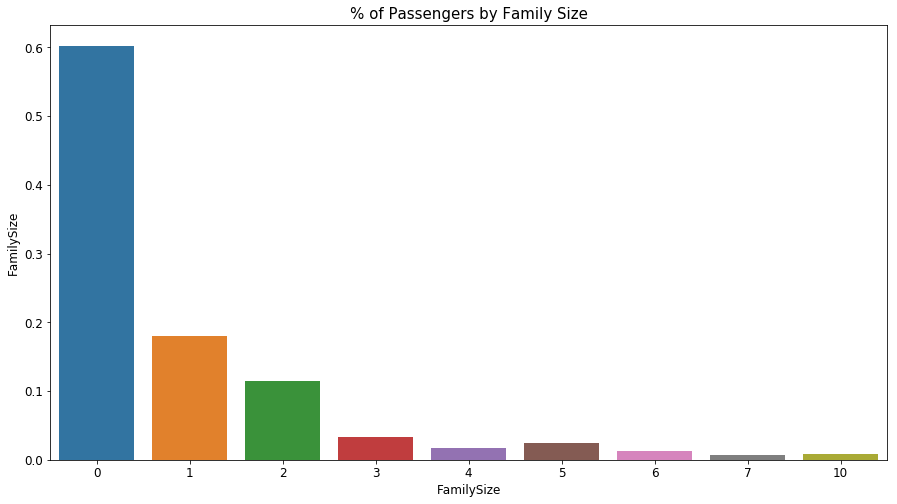

In [52]:
# <b>Let us combine SibSp and Parch and consider that as a single feature - "FamilySize". We'll perform EDA on FamilySize.</b>
train_data['FamilySize'] = train_data.SibSp + train_data.Parch
fig, axes = plt.subplots(figsize=(15,8))
sns.barplot(
    x=train_data['FamilySize'], 
    y=train_data['FamilySize'], 
    estimator=lambda x: len(x) / len(train_data), 
    ax=axes)
axes.set_title('% of Passengers by Family Size', fontsize=15)
plt.show()

**Ticket, Fare, Cabin and Embarked**
<br>There might be a relationship between these features. Let's explore that below, and use that to predict missing values of Cabin.
<br>Ticket number is an alphanumeric value and has no apparent relation with other features.
<br>There are many missing values of Cabin feature, and it is not useful in its entirety. The first alphabet of Cabin might be useful. Let's take that out and call that as CabinDeck.
<br>We'll then explore the relationship between CabinDeck, Fare, Embarked and Pclass in next section.
<br><br><b>Observations:</b>
* Almost 30% passengers boarded Cabin Deck "C", followed by "B" and "D".
* Majority of passengers purchased ticket of fare less than 40.
* All fares are within the range of 0 to 260, and there is an outlier of approx 500.
* More than 70% passengers boarded from Southampton, while only 20% and 10% from Cherbourg and Queenstown respectively.

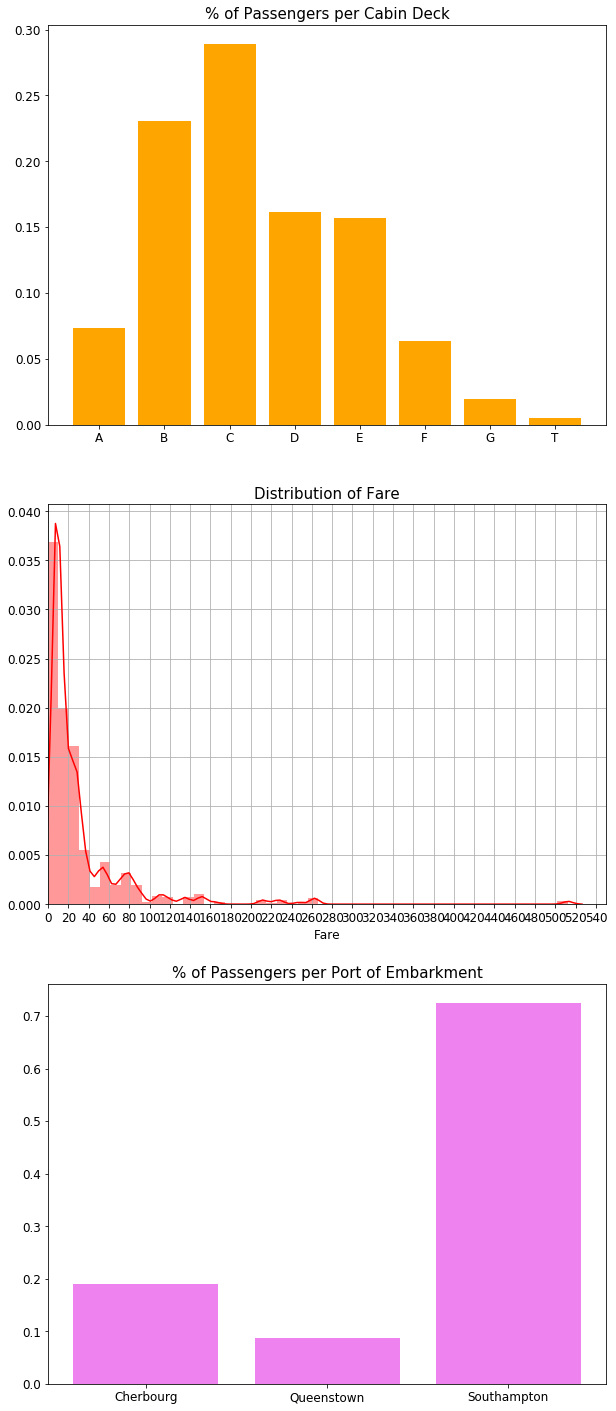

In [53]:
# Save first alphabet of Cabin as CabinDeck
train_data["CabinDeck"] = train_data.Cabin.str[0]

# Plot graph for Fare, Cabin and Embarked
fig, axes = plt.subplots(3, 1, figsize=(10,25))

# Cabin Deck
data = train_data["CabinDeck"].value_counts(normalize=True).sort_index()
axes[0].bar(data.index, data, color='orange')
axes[0].set_title('% of Passengers per Cabin Deck', fontsize=15)

# Fare
sns.distplot(train_data['Fare'], color='r', ax=axes[1])
axes[1].set(xlabel='Fare', ylabel='')
axes[1].set_title('Distribution of Fare', fontsize=15)
axes[1].grid(True)
axes[1].set_xticks(np.arange(0, 550, 20))
axes[1].set_xlim(0,550)

# Embarked
data = train_data["Embarked"].value_counts(normalize=True).sort_index()
axes[2].bar(data.index, data, color='violet')
axes[2].set_title('% of Passengers per Port of Embarkment', fontsize=15)
axes[2].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])

plt.show()

## Section 3 : Prepare data for analysis: Pre-process data
Some feature engineering

### Section 3A : Cleanup data
There is data missing for - Age (~20%), Cabin (~77%) and Embarked attribute (~0.2%) features in test dataset.
<br>NOTE: We will apply the same strategy to clean both training and test data in this section.

**Fill missing data for "Age"**
<br>Let's plot Salutation vs Age, to find the range of Age for each Salutation. This'll help us decide if we can use median or mean of Age grouped by Salutation to fill in the missing Age values.

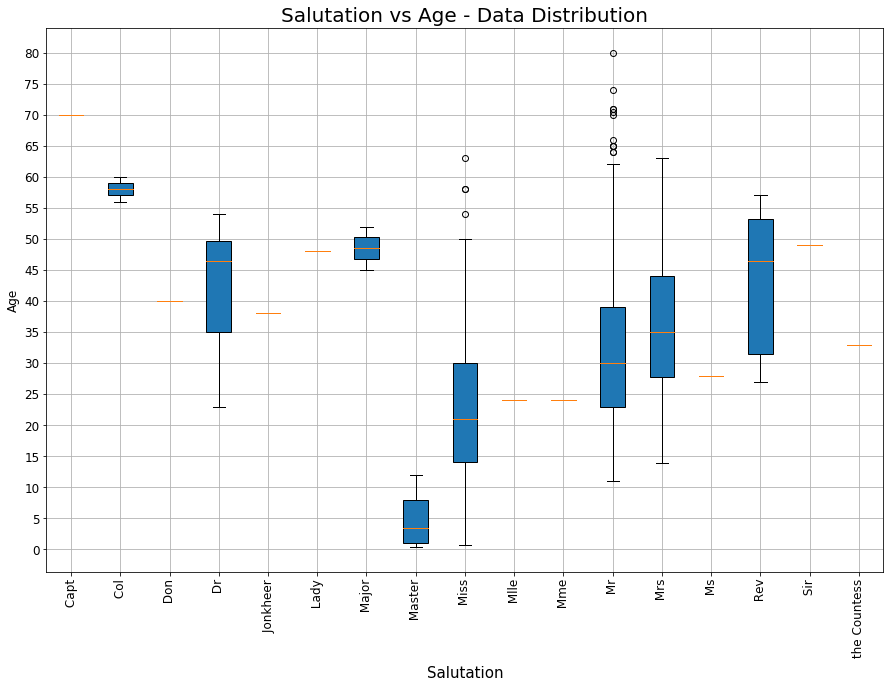

In [54]:
# Fetch only the non-null age values and corresponding salutation
age_sal = train_data.loc[train_data['Age'].notnull(), ['Age', 'Salutation']]
age = age_sal.iloc[:,0]
sal = age_sal.iloc[:,1]

# Fetch Age grouped by Salutation and convert each set into a list
age_sal_grouped = age_sal.groupby("Salutation").Age.apply(list)

# Plot a boxplot
fig, axes = plt.subplots(figsize=(15,10))
axes.boxplot(age_sal_grouped, patch_artist=True)
axes.set_xticklabels(age_sal_grouped.index, rotation='vertical')
axes.set_yticks(np.arange(0, 85, 5))
axes.grid(True)
axes.set_xlabel('Salutation', fontsize=15)
axes.set_ylabel('Age', fontsize=12)

axes.set_title('Salutation vs Age - Data Distribution', fontsize=20)
plt.show()

<b>Conclusion: </b>As per the Salutation vs Age box plot, the median age for each Salutation looks distinct and well representing as a standard age for the salutation. Based on the above findings, let's replace the missing Age values with median of Ages as per Salutation group.
<br>Observation: The new distribution of age (with filled data) looks similar to earlier one from Section 2, which means that the distribution remains same after transformation.

Missing values in Age column now: in training data = 0  and in test data = 0


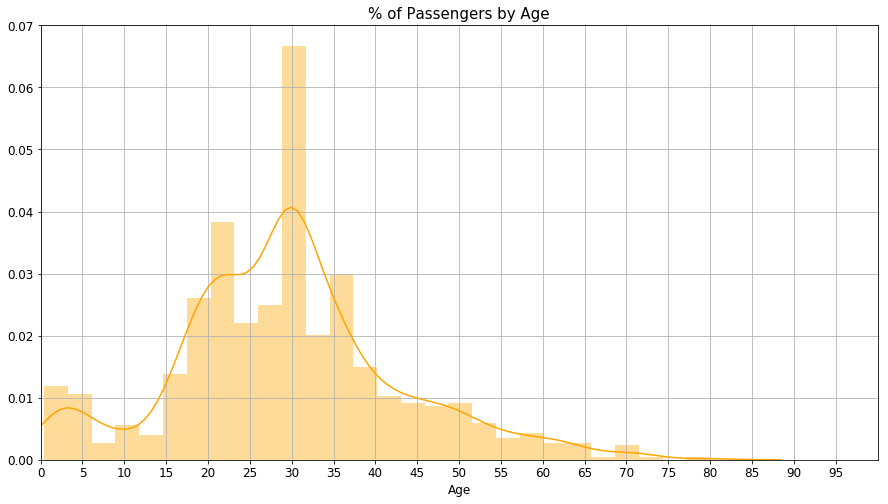

In [55]:
# Fill missing Age values on train and test data
age_sal_grouped_median = train_data.groupby("Salutation", as_index=False).Age.median()
joined = train_data.merge(age_sal_grouped_median, on="Salutation", how="inner")
train_data.Age = train_data.Age.fillna(joined.Age_y, axis=0)
test_data.Age = test_data.Age.fillna(joined.Age_y, axis=0)
print("Missing values in Age column now: in training data =", train_data.Age.isnull().sum(), " and in test data =", test_data.Age.isnull().sum())

# Plot a graph for Age
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(train_data["Age"], color='orange', ax=axes)
axes.set_title('% of Passengers by Age', fontsize=15)
axes.set_xlim(0,100)
axes.set_xticks(np.arange(0, 100, 5))
axes.grid(True)
plt.show()

**Fill missing data for "Embarked"**
<br>Since Southampton is the most boarded port, we'll fill the value of missing Embarked with "S".

In [56]:
train_data.Embarked = train_data.Embarked.fillna('S', axis=0)
print("Missing values in Embarked column now:", train_data.Embarked.isnull().sum())

Missing values in Embarked column now: 0


**Fill missing data for "Fare" (only in test dataset)**
<br>Fare in test dataset is missing for only a single record, hence we will fill this with mean value of Fare.

In [57]:
test_data.Fare = train_data.Age.fillna(train_data.Fare.mean(), axis=0)
print("Missing values in Fare column now: in test data =", test_data.Fare.isnull().sum())

Missing values in Fare column now: in test data = 0


**Fill missing data for "Cabin" (or rather, "CabinDeck")**
<br>Let's explore relationship between Cabin Deck with Fare and Passneger Class. If we find a correlation, we'll fill the values acordingly.

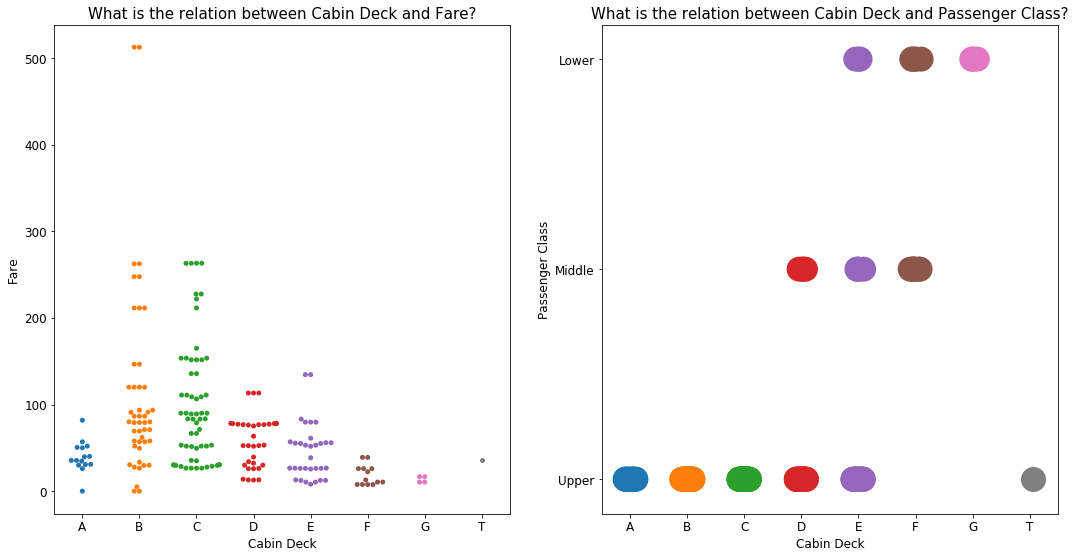

In [58]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(18,9))

# Plot relation between Cabin Deck and Fare
data = train_data[['CabinDeck', 'Fare', 'Pclass']].sort_values('CabinDeck')
sns.swarmplot(data.iloc[:,0], data.iloc[:,1], ax=axes1)
axes1.set_xlabel('Cabin Deck')
axes1.set_ylabel('Fare')
axes1.set_title('What is the relation between Cabin Deck and Fare?', fontsize=15)

# Plot relation between Cabin Deck and Passenger Class
sns.stripplot(data.iloc[:,0], data.iloc[:,2], size=25, ax=axes2)
axes2.set_xlabel('Cabin Deck')
axes2.set_ylabel('Passenger Class')
axes2.set_yticklabels(['Upper', 'Middle', 'Lower'])
axes2.set_yticks([1,2,3])
axes2.set_title('What is the relation between Cabin Deck and Passenger Class?', fontsize=15)

plt.show()

<b>Conclusion: </b>
<br>1. There is no clear relationship between fare and cabin deck - different cabin decks have been assigned for same range of fares, especially for fares below 250.
<br>2. Upper class passengers were exclusively travelling by cabin deck A, B and C. However, D and E had passengers from all classes. Hence, there is no clear relationship between Cabin Deck and Passenger Class.
<br>3. We can extend the argument with an alternate view - that it is possible that the passengers for whom "Cabin" feature is empty might have been travelling in non-cabin seats. Which means, there's nothing wrong with empty Cabin values. In that case, we can create a new feature as "CabinAvail", such that CabinAvail = 1 if Cabin is not-null and CabinAvail = 0 if Cabin is null. We'll do that in next Section.

### Section 3B : Mung data
We'll add few new features and convert string features into interger values.

We will perform the following data transformations in this section.
* Add new feature: "CabinAvail" - such that CabinAvail = 1 if Cabin is not-null and CabinAvail = 0 if Cabin is null.
* Add new feature: "Gender" - Male = 0 and Female = 1
* Add new feature: "EmbarkPort" - S = 1, C = 2, Q = 3

In [59]:
# Add CabinAvail
train_data["CabinAvail"] = train_data["Cabin"].notnull().astype('int')
test_data["CabinAvail"] = test_data["Cabin"].notnull().astype('int')

# Add Gender
sex_mapping = {"male": 0, "female": 1}
train_data['Gender'] = train_data['Sex'].map(sex_mapping)
test_data['Gender'] = test_data['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['EmbarkPort'] = train_data['Embarked'].map(embarked_mapping)
test_data['EmbarkPort'] = test_data['Embarked'].map(embarked_mapping)

## Section 4 : Analyze data (through visualizations)
We will explore the relationship between Survival and different features, and try to find out how each feature contributes to the chance of survival.

### What is the relation between Survival and Sex?

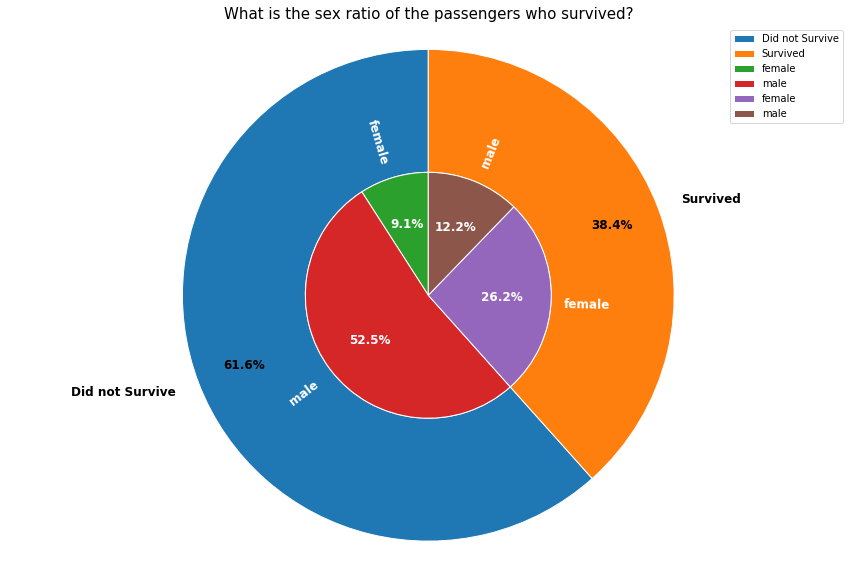

In [60]:
# Pie chart of Survival percentage
fig, axes = plt.subplots(figsize=(15,10))
width = 0.5

# Percentage of Survived vs Did not survive 
data = train_data.Survived.value_counts().sort_index()
axes.pie(
    data,
    labels=['Did not Survive', 'Survived'],
    #shadow=True,
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1
)

# Percentage of Sex based on Survival
data = train_data.groupby(["Survived", "Sex"]).size().reset_index()
axes.pie(
    data.iloc[:,2], 
    labels=list(data.Sex),
    #shadow=True,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True
)

axes.set_title('What is the sex ratio of the passengers who survived?', fontsize=15)
axes.legend(loc='best', bbox_to_anchor=(1,1))
axes.axis('equal')
plt.show()

<b>Observations and Conclusions:</b>
* Out of all passengers, only 38.4% could survive while 61.6% could not.
* 52.5% of paasengers onboard, who perished, were male, while only 9.1% was female.
* Thus, females had a higher chance of survival. 
* Hence, "Gender" is an important feature for classification prediction.

### Is there any relation between Age, Sex and Survival?

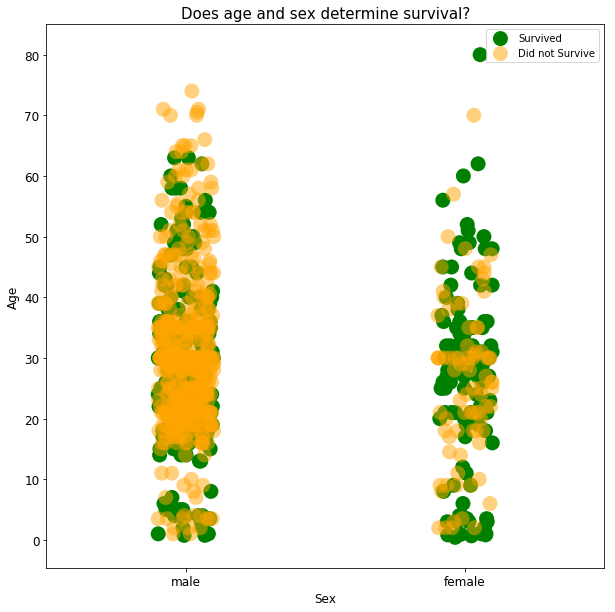

In [61]:
fig, axes1 = plt.subplots(figsize=(10,10))

# Find index of train_data based on value of Survived
idxYes = np.where(train_data.Survived == 1)
idxNo = np.where(train_data.Survived == 0)

# Plot relation between Age and Survival
data = train_data[['Age', 'Survived']].sort_values('Survived')
sns.stripplot(train_data.iloc[idxYes].Sex, train_data.iloc[idxYes].Age, jitter=True, color='green', size=15, label="Survived", ax=axes1)
sns.stripplot(train_data.iloc[idxNo].Sex, train_data.iloc[idxNo].Age, jitter=True, color='orange', size=15, alpha=0.5, label="Did not Survive", ax=axes1)
axes1.set_xlabel('Sex')
axes1.set_ylabel('Age')
axes1.set_title('Does age and sex determine survival?', fontsize=15)
handles, labels = axes1.get_legend_handles_labels()
axes1.legend((handles[0], handles[2]), (labels[0], labels[2]), loc='best')
plt.show()

<b>Observations and Conclusions:</b>
* This diagram corroborates what we observed in previous diagram - survival rate was much higher among females.
* In addition, among males between 15 to 40 years, chances of survival was very dim.
* Most of the elderly females survived (including an 80 year old lady), while the elderly male did not.
* Chances of survival was higher among passenger aged between 0 to 10 years. 
* Thus, "Age" is an important feature for classification prediction.

To corroborate out observation further, we will <b>classify the Ages into buckets/groups</b> and see how does Survival relate to that. This idea is inspired from [Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner).

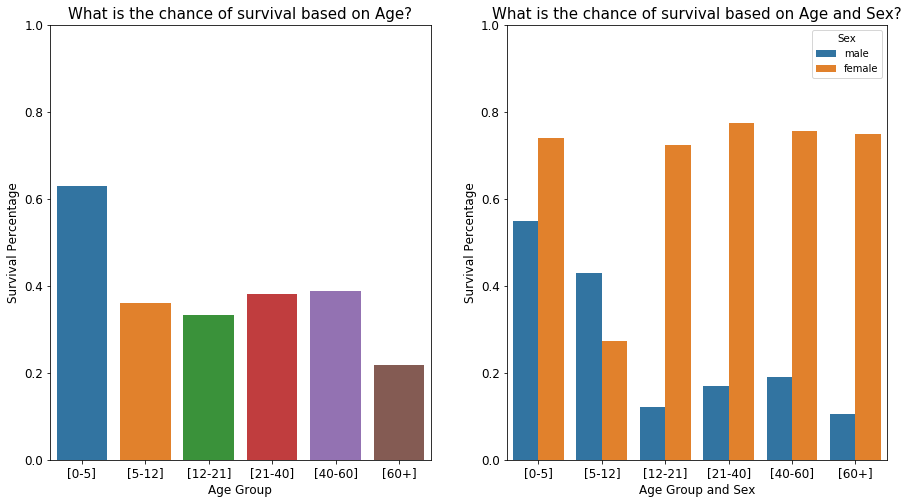

In [62]:
# Divide the ages into bins
bins = [0, 5, 12, 21, 40, 60, np.inf]
labels = ['[0-5]', '[5-12]', '[12-21]', '[21-40]', '[40-60]', '[60+]']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels=labels)

# Draw a bar plot of Age vs. survival
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,8))
sns.barplot(x="AgeGroup", y="Survived", data=train_data, ci=None, ax=axes1)
axes1.set_xlabel('Age Group', fontsize=12)
axes1.set_ylabel('Survival Percentage', fontsize=12)
axes1.set_ylim(0,1)
axes1.set_title('What is the chance of survival based on Age?', fontsize=15)

sns.barplot(x="AgeGroup", y="Survived", hue="Sex", data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Age Group and Sex', fontsize=12)
axes2.set_ylabel('Survival Percentage', fontsize=12)
axes2.set_ylim(0,1)
axes2.set_title('What is the chance of survival based on Age and Sex?', fontsize=15)

plt.show()

<b>Observations and Conclusions:</b>
* As we already saw earlier, survival rate is higher among younder passengers (especially between 0 to 5).
* In all age groups, number of female survivors were more, except for 5-12 age group in which more male survived.
* In each age group, as value of age progresses, percentage of male survivor diminishes which female survivors remain more or less constant.
* Hence, "Age" is an important feature for classification prediction.

### What is the relation between Fare and Survival?
Since fare is a continuous variable, we will classify the fares into buckets/groups and see how does Survival relate to that.

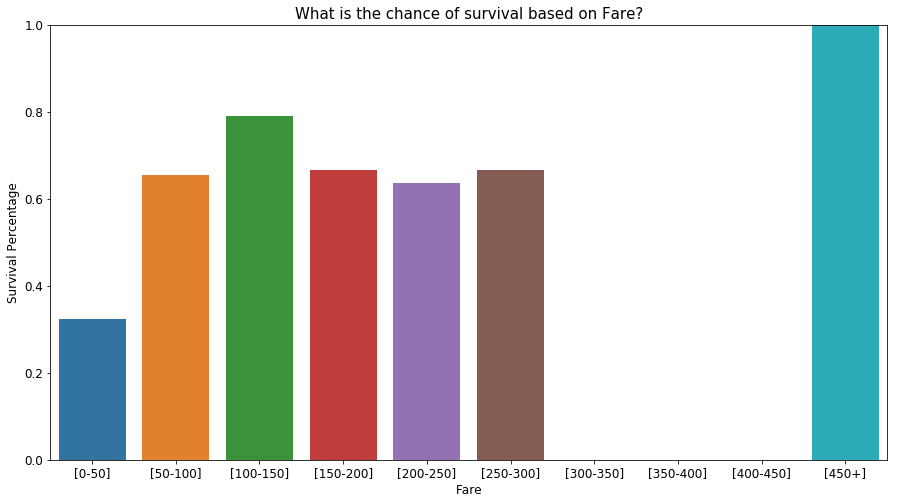

In [63]:
fig, axes1 = plt.subplots(figsize=(15,8))

# Divide Fare into bins and plot Survival for each Fare bin
# Range of Fare is from 0 to 512
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, np.inf]
labels = ['[0-50]', '[50-100]', '[100-150]','[150-200]', '[200-250]','[250-300]', '[300-350]', '[350-400]', '[400-450]', '[450+]']
train_data['FareGroup'] = pd.cut(train_data["Fare"], bins, labels=labels)

# Draw a bar plot of Age vs. survival
sns.barplot(x="FareGroup", y="Survived", data=train_data, ci=None, ax=axes1)
axes1.set_xlabel('Fare', fontsize=12)
axes1.set_ylabel('Survival Percentage', fontsize=12)
axes1.set_ylim(0,1)
axes1.set_title('What is the chance of survival based on Fare?', fontsize=15)

plt.show()

<b>Observations and Conclusions:</b>
* Lower fare had lower chance of survival.
* There is an outlier of fare 512 and that passenger survived.
* Passengers with fare between 100 to 150 had highest rate of survival.
* Survival of other fare brackets were more or less same.
* Hence, "Fare" is an important feature for classification prediction.

### Did Survival depend on Passenger Class? 
Let us try to find that out with 2 different diagrams.

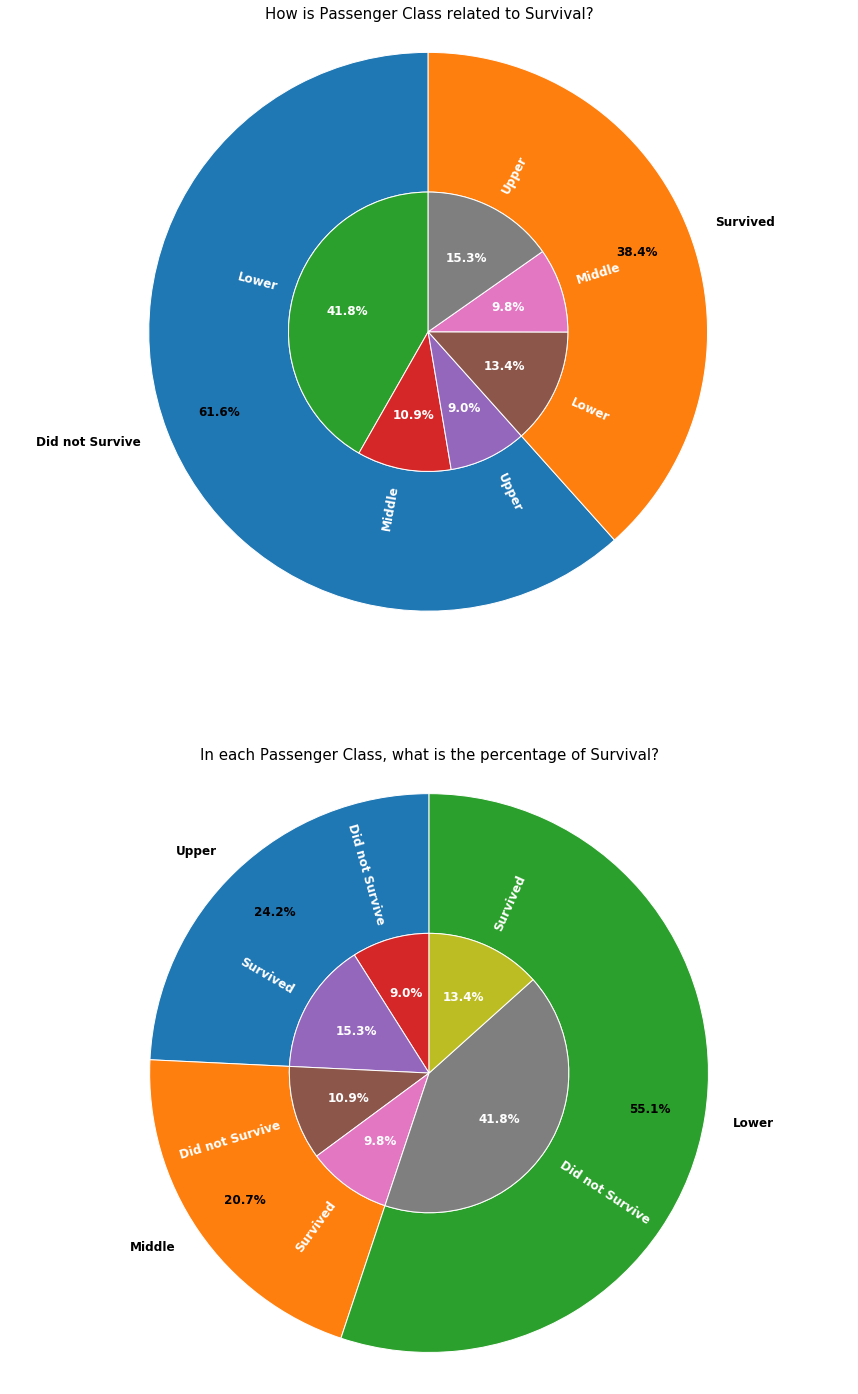

In [64]:
# Pie chart of Survival percentage
fig, (axes1, axes2) = plt.subplots(2,1,figsize=(15,25))
width = 0.5

# Percentage of Survived vs Did not survive 
data = train_data.Survived.value_counts().sort_index()
axes1.pie(
    data,
    labels=['Did not Survive', 'Survived'],
    #shadow=True,
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1
)

# Percentage of Passenger Class based on Survival
data = train_data.groupby(["Survived", "Pclass_str"]).size().reset_index()
axes1.pie(
    data.iloc[:,2], 
    labels=list(data.Pclass_str),
    #shadow=True,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True
)

axes1.set_title('How is Passenger Class related to Survival?', fontsize=15)
#axes1.legend(loc='best', bbox_to_anchor=(0,1))
axes1.axis('equal')

# Now we look at Survival vs Passenger Class from the opposite perspective
# Percentage of Passenger Class 
data = train_data.Pclass.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Upper', 'Middle','Lower'],
    #shadow=True,
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1
)

# Percentage of Survival based on Passenger Class
data = train_data.groupby(["Pclass", "Survived"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=['Did not Survive', 'Survived']*3,
    #shadow=True,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True
)

axes2.set_title('In each Passenger Class, what is the percentage of Survival?', fontsize=15)
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

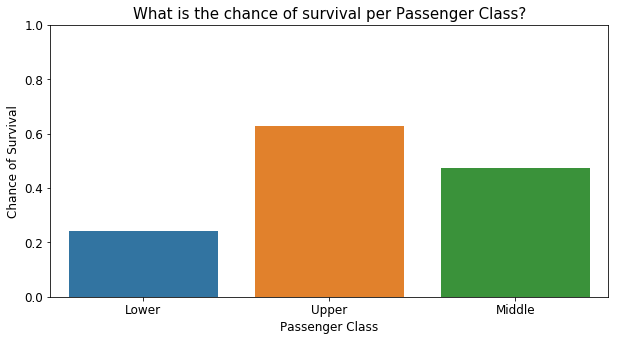

In [65]:
fig, axes = plt.subplots(figsize=(10,5))
# Pclass of passengers who survived
sns.barplot(x="Pclass_str", y="Survived", data=train_data, ci=None, ax=axes)
axes.set_xlabel('Passenger Class', fontsize=12)
axes.set_ylabel('Chance of Survival', fontsize=12)
axes.set_ylim(0,1)
axes.set_title('What is the chance of survival per Passenger Class?', fontsize=15)
plt.show()

<b>Observations and Conclusions:</b>
* Maximum casualty is observed with passengers of Lower (3) Pclass - 41.8%.
* Upper (1) and Middle (2) Pclass had much higher chance of survival.
* If total passenger per Pclass is considered, even in that case Upper and Middle fare much better than Lower Pclass in terms of survival.
* Hence, "Pclass" is an important feature for classification prediction.

### Did Survival depend on size of Family?

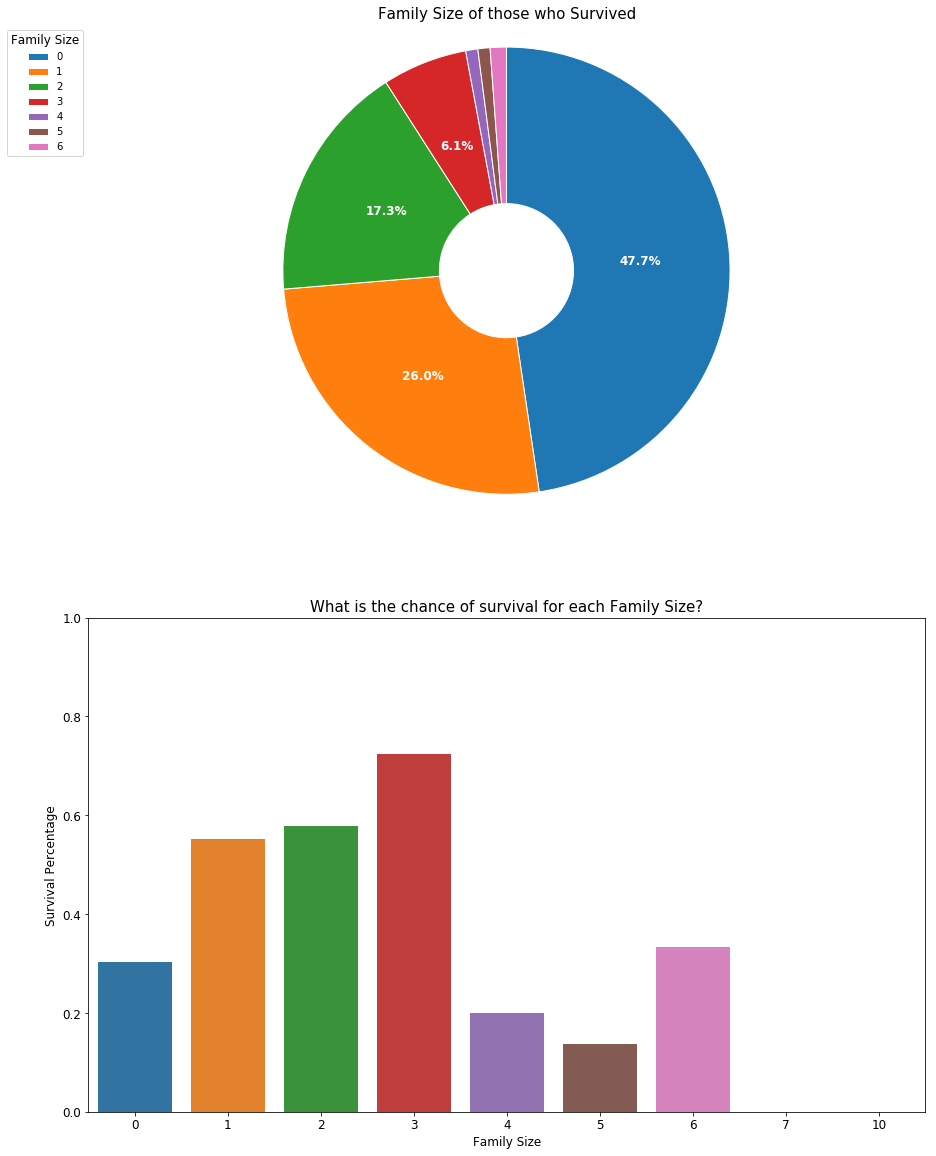

In [66]:
fig, (axes1, axes2) = plt.subplots(2,1,figsize=(15,20))
width = 0.7

# Relation between family size and survival
data = train_data.iloc[idxYes].groupby(["FamilySize"]).size().reset_index()
axes1.pie(
    data.iloc[:,1], 
    labels=list(data.FamilySize),
    labeldistance=1.0,
    autopct=lambda pct: "{:.1f}%".format(pct) if pct > 5.0 else "",
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    #radius=1-width,
    rotatelabels=True,
    counterclock=False
)

axes1.set_title('Family Size of those who Survived', fontsize=15)
#axes1.legend(["Each Pie = Family Size"], loc='best', bbox_to_anchor=(1,0))
axes1.legend(data.FamilySize, title="Family Size", loc='best', bbox_to_anchor=(0,1))
axes1.axis('equal')

# Draw a bar plot of Family Size vs Survival
sns.barplot(x="FamilySize", y="Survived", data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Family Size', fontsize=12)
axes2.set_ylabel('Survival Percentage', fontsize=12)
axes2.set_ylim(0,1)
axes2.set_title('What is the chance of survival for each Family Size?', fontsize=15)

plt.show()

<b>Observations and Conclusions:</b>
* Out of all passengers who survived, 47.7% were travelling alone, 26% had 1 additional member while 17.3% had 2 and only 6.1% had 3.
* Passengers with 4 or more family members on-board had very less chance of survival.
* A very interesting observation appears when percentage of survival is calculated based on the number of passengers per family size.
* * Passengers with 3 family members survived most - probably 3 members are optimum enough save each other.
* * Passengers with 1 or 2 family members had decent chance of survival as well.
* * Passengers travelling alone had poor chance of survival.
* Hence, "FamilySize" is an important feature for classification prediction.

### Is there a relationship between Cabin Availibility, Port of Embarkation and chances of Survival?

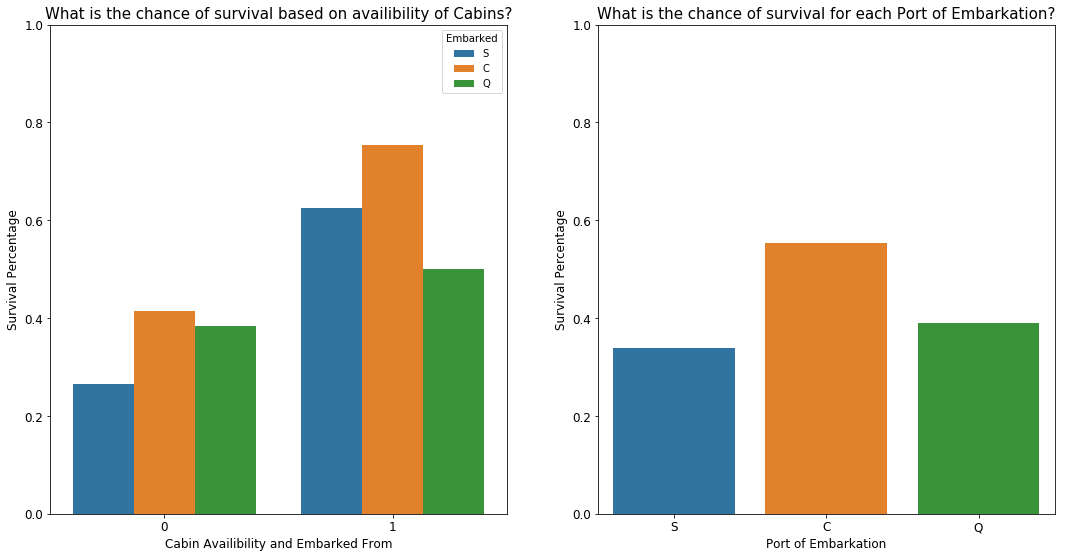

In [67]:
# Draw a bar plot of Passenger Class vs Survival
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(18,9))
sns.barplot(x="CabinAvail", y="Survived", hue="Embarked", data=train_data, ci=None, ax=axes1)
axes1.set_xlabel('Cabin Availibility and Embarked From', fontsize=12)
axes1.set_ylabel('Survival Percentage', fontsize=12)
axes1.set_ylim(0,1)
axes1.set_title('What is the chance of survival based on availibility of Cabins?', fontsize=15)

# Draw a bar plot of Family Size vs Survival
sns.barplot(x="Embarked", y="Survived", data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Port of Embarkation', fontsize=12)
axes2.set_ylabel('Survival Percentage', fontsize=12)
axes2.set_ylim(0,1)
axes2.set_title('What is the chance of survival for each Port of Embarkation?', fontsize=15)

plt.show()

<b>Observations and Conclusions:</b>
* Passengers travelling by Cabins had a much higher chance of survival.
* Passengers who boarded from Cherbourg had a much higher chance of survival.
* Hence, "CabinAvail" and "EmbarkPort" both are important features for classification prediction.

<b>Conclusion:</b>
* Following input features will be used to build classification prediction models:
* * 'Gender'
* * 'Age'
* * ''Fare'
* * 'Pclass'
* * 'FamilySize'
* * 'CabinAvail'
* * 'EmbarkPort'
* Output/Predict - 'Survived'

## Section 5 : Build prediction model and predict outcomes on unseen data
In this section, we will build models using popular classfication algorithms and try to predict chance of survival on test dataset.

### Refer to notebook titled - "titanic-disaster-and-survival-models.ipynb"

<b>Thank you</b> for reading this notebook! I will keep updating this notebook through multiple iterations.
<br>Please share your thoughts, feedback and suggestions in the comments section in Kaggle, and upvote if you like this notebook :-)
<br><br><b>Inspirations:</b>
<br>- https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data
<br>- https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner